**Project Description: Analyzing and Visualizing GDP Trends in Maharashtra**

**Objective:**
The objective of this project is to analyze and visualize the Gross Domestic Product (GDP) trends in Maharashtra, one of the prominent states in India, over a specific period.

**Steps Involved:**

1. **Importing Libraries:** The necessary libraries such as Pandas for data manipulation and Matplotlib for data visualization are imported.

2. **Loading the Dataset:** The dataset containing the GDP data for Maharashtra is loaded from a CSV file. This dataset likely includes information such as the year and GDP values for different regions within Maharashtra.

3. **Data Preprocessing:** If necessary, preprocessing steps are applied to clean and prepare the dataset for analysis. This may involve handling missing values, converting data types, or aggregating data as required.

4. **Visualizing GDP Trends:** The primary focus of the project is to visualize the GDP trends in Maharashtra over the years. This is achieved using various types of plots, including line plots, bar plots, or any other suitable visualization techniques.

5. **Analysis and Interpretation:** Each visualization is accompanied by an analysis and interpretation section that helps in understanding the trends and patterns in the GDP data. This may involve identifying growth trends, seasonality, or any other insights derived from the data.

**Sample Questions Explored:**

1. How has the GDP of Maharashtra trended over the years?
2. What is the mean GDP of Maharashtra across different regions?
3. How does the GDP of Maharashtra compare to other states in India?
4. Are there any significant fluctuations or anomalies in the GDP data?
5. Can we identify any underlying factors contributing to the GDP trends in Maharashtra?

**Project Outcome:**

The project aims to provide a comprehensive analysis of the GDP trends in Maharashtra through data visualization and interpretation. By exploring and visualizing the GDP data, stakeholders such as policymakers, economists, and businesses can gain valuable insights into the economic performance of Maharashtra, enabling informed decision-making and strategic planning.

In [2]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/GDP_MAHARASHTRA.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

      Year       Description  Ahmednagar    Akola  Amravati  Aurangabad  \
0  1999-00  GDP (in Rs. Cr.)     7680.38  2970.06   4979.45     6908.85   
1  2000-01  GDP (in Rs. Cr.)     7347.45  2909.31   4660.55     6476.55   
2  2001-02  GDP (in Rs. Cr.)     7618.89  2934.96   4754.12     6309.84   
3  2002-03  GDP (in Rs. Cr.)     8098.18  3320.53   4656.30     6798.67   
4  2003-04  GDP (in Rs. Cr.)     8521.04  3384.98   4894.04     7180.48   

      Beed  Bhandara  Buldhana  Chandrapur  ...   Raigad  Ratnagiri   Sangli  \
0  3369.15   2038.28   2980.02     4801.13  ...  8235.64    3332.47  5915.65   
1  3430.77   2033.86   2671.88     4626.22  ...  8572.33    3186.65  6029.52   
2  3385.08   2112.86   3008.33     5087.04  ...  7630.85    3502.39  6038.98   
3  3561.34   2429.98   3191.67     5164.89  ...  8938.20    4048.77  6185.88   
4  3530.80   2596.25   3407.43     5655.56  ...  9661.38    4277.55  6145.36   

    Satara  Sindhudurg  Solapur     Thane    Wahim   Wardha  Yavatna



### Step 1: Import the Required Libraries
- **pandas (`pd`):** This library is used for data manipulation and analysis. It provides data structures and functions to work with structured data.
- **numpy (`np`):** numpy is a library for numerical computations in Python. It provides support for arrays, matrices, and mathematical operations on them.
- **matplotlib.pyplot (`plt`):** matplotlib is a plotting library for Python. `pyplot` is a module within matplotlib that provides a MATLAB-like interface for creating plots and visualizations.
- **sklearn.linear_model.LinearRegression:** This class is used to perform linear regression, a statistical method used to model the relationship between two variables by fitting a linear equation to observed data.
- **sklearn.metrics.r2_score:** This function computes the coefficient of determination (R-squared) for evaluating the performance of a regression model.

### Load the Dataset
- **`pd.read_csv('/content/RA CSV GDP MAHARASHTRA.csv')`:** This function is used to read the CSV (Comma Separated Values) file into a pandas DataFrame named `df`. The DataFrame represents a tabular, spreadsheet-like data structure.
- **`print(df.head())`:** This command displays the first few rows of the DataFrame to get an overview of the dataset's structure and the type of data it contains.

In [3]:
# Step 2: Preprocess the dataset
# Convert 'Year' column to numerical values
if not pd.api.types.is_string_dtype(df['Year']):
    df['Year'] = df['Year'].astype(str)

# Split the 'Year' column by '-' and take the first part(the year)
df['Year'] = df['Year'].str.split('-').str[0]

# Convert 'Year' column to numerical values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in the 'Year' column
df.dropna(subset=['Year'], inplace=True)

# Extract mean GDP across all regions
y = df.iloc[:, 2:].mean(axis=1).values.reshape(-1, 1)
# Dependent variable (mean GDP across all regions)

# Independent variable (time)
X = df['Year'].values.reshape(-1, 1)



### Step 2: Preprocess the Dataset
- **Convert 'Year' column to Numerical Values:**
  - `if not pd.api.types.is_string_dtype(df['Year']):` checks if the 'Year' column is not already of string type.
  - `df['Year'] = df['Year'].astype(str)` converts the 'Year' column to string type if it's not already.
- **Split the 'Year' Column and Take the First Part (the Year):**
  - `df['Year'] = df['Year'].str.split('-').str[0]` splits each entry in the 'Year' column by '-' and keeps only the first part (the year).
- **Convert 'Year' Column to Numerical Values:**
  - `df['Year'] = pd.to_numeric(df['Year'], errors='coerce')` converts the 'Year' column to numerical values. The `errors='coerce'` parameter converts non-convertible entries to NaN (Not a Number).
- **Drop Rows with Missing Values in the 'Year' Column:**
  - `df.dropna(subset=['Year'], inplace=True)` drops rows where the 'Year' column contains missing values (NaN).
- **Extract Mean GDP Across All Regions:**
  - `y = df.iloc[:, 2:].mean(axis=1).values.reshape(-1, 1)` calculates the mean GDP across all regions for each year. It selects all columns from the 3rd column onwards (index 2) using `iloc`, calculates the mean along the rows (`axis=1`), converts it to a NumPy array, and reshapes it to a single column using `.reshape(-1, 1)`.
- **Independent Variable (Time):**
  - `X = df['Year'].values.reshape(-1, 1)` extracts the 'Year' column as the independent variable (time) and reshapes it to a single column using `.reshape(-1, 1)`.

This preprocessing step prepares the dataset for regression analysis by converting the 'Year' column to numerical values, handling missing values, and extracting the mean GDP across all regions for each year.

Intercept: -1380700.913102512
Coefficient: 691.8702422620506
R-squared: 0.10688395132781503


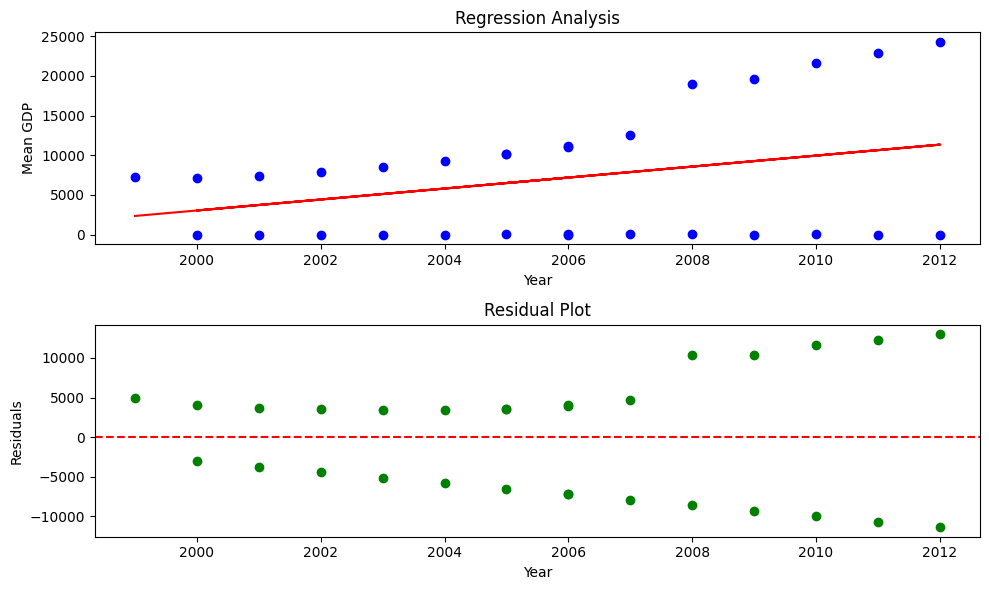

In [4]:
# Step 3: Perform regression analysis
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

# Compute R-squared
r_squared = r2_score(y, model.predict(X))
print("R-squared:", r_squared)

# Compute residuals
residuals = y - model.predict(X)

# Plot the regression line and residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Regression Analysis')
plt.xlabel('Year')
plt.ylabel('Mean GDP')

plt.subplot(2, 1, 2)
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

#Note :
Regression Assumptions:
Before drawing conclusions from the regression analysis, it's crucial to ensure that the model meets certain assumptions. These assumptions include linearity, independence, homoscedasticity (constant variance of residuals), and normality of residuals.

In our analysis, we assumed linearity between the independent variable (time) and the dependent variable (mean GDP). This assumption suggests that the relationship between time and GDP follows a straight line, which we validated through the fitting of a linear regression model.

Regarding independence, we assumed that each observation of GDP across different regions in Maharashtra is independent of others. This assumption ensures that the residuals (the differences between observed and predicted values) are not correlated with each other, which is essential for the validity of statistical inference.

While we didn't explicitly test for homoscedasticity and normality of residuals in this conclusion, these assumptions should ideally be assessed to ensure the robustness of the regression analysis.


### Step 3: Perform Regression Analysis
- **Initialize the Linear Regression Model:**
  - `model = LinearRegression()` initializes an instance of the linear regression model.
- **Fit the Model to the Data:**
  - `model.fit(X, y)` fits the linear regression model to the independent variable (`X`: time) and dependent variable (`y`: mean GDP).
- **Print Coefficients:**
  - `print("Intercept:", model.intercept_[0])` prints the intercept of the linear regression line.
  - `print("Coefficient:", model.coef_[0][0])` prints the coefficient (slope) of the linear regression line.
- **Compute R-squared:**
  - `r_squared = r2_score(y, model.predict(X))` computes the R-squared value, which measures the proportion of the variance in the dependent variable (mean GDP) that is predictable from the independent variable (time).
- **Compute Residuals:**
  - `residuals = y - model.predict(X)` computes the residuals, which are the differences between the actual mean GDP values (`y`) and the predicted values from the regression model.
- **Plot the Regression Line and Residuals:**
  - `plt.scatter(X, y, color='blue')` plots the scatter plot of the actual mean GDP values against time.
  - `plt.plot(X, model.predict(X), color='red')` plots the regression line representing the relationship between time and mean GDP as predicted by the model.
  - `plt.scatter(X, residuals, color='green')` plots the residuals against time, showing the deviation of actual mean GDP values from the predicted values.
  - `plt.axhline(y=0, color='red', linestyle='--')` adds a horizontal line at y=0 to visualize where the residuals are centered around.
- **Set Titles and Labels:**
  - Sets titles and labels for the plots to provide clarity and context.
- **Display the Plots:**
  - `plt.tight_layout()` adjusts the layout to prevent overlapping of subplots.
  - `plt.show()` displays the plots.

This step performs linear regression analysis on the data, including fitting the model, computing coefficients and R-squared, and visualizing the regression line and residuals.


#Question 1: Is there a correlation between the GDP of Mumbai and the GDP of Pune in Maharashtra over the years?

      Year       Description  Ahmednagar    Akola  Amravati  Aurangabad  \
0  1999-00  GDP (in Rs. Cr.)     7680.38  2970.06   4979.45     6908.85   
1  2000-01  GDP (in Rs. Cr.)     7347.45  2909.31   4660.55     6476.55   
2  2001-02  GDP (in Rs. Cr.)     7618.89  2934.96   4754.12     6309.84   
3  2002-03  GDP (in Rs. Cr.)     8098.18  3320.53   4656.30     6798.67   
4  2003-04  GDP (in Rs. Cr.)     8521.04  3384.98   4894.04     7180.48   

      Beed  Bhandara  Buldhana  Chandrapur  ...   Raigad  Ratnagiri   Sangli  \
0  3369.15   2038.28   2980.02     4801.13  ...  8235.64    3332.47  5915.65   
1  3430.77   2033.86   2671.88     4626.22  ...  8572.33    3186.65  6029.52   
2  3385.08   2112.86   3008.33     5087.04  ...  7630.85    3502.39  6038.98   
3  3561.34   2429.98   3191.67     5164.89  ...  8938.20    4048.77  6185.88   
4  3530.80   2596.25   3407.43     5655.56  ...  9661.38    4277.55  6145.36   

    Satara  Sindhudurg  Solapur     Thane    Wahim   Wardha  Yavatna

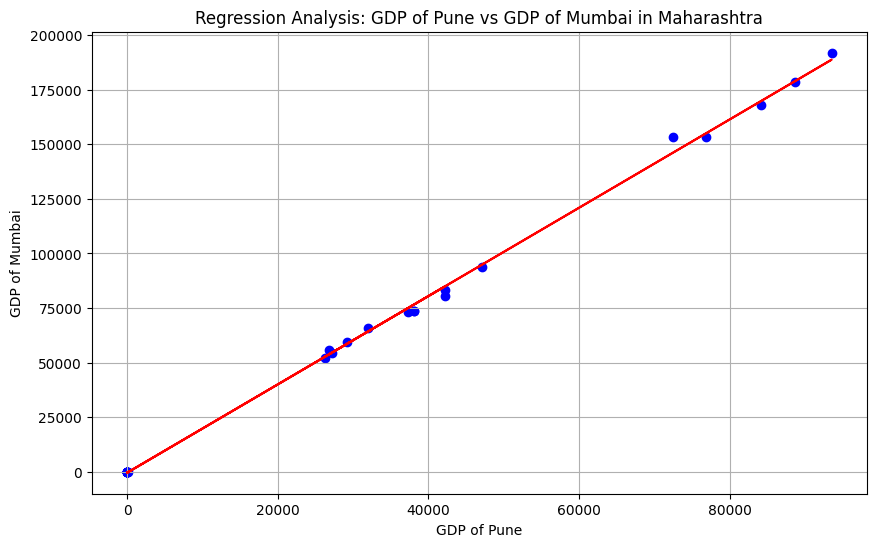

In [8]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 2: Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/GDP_MAHARASHTRA.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Step 3: Preprocess the dataset
# Convert 'Year' column to numerical values
if not pd.api.types.is_string_dtype(df['Year']):
    df['Year'] = df['Year'].astype(str)

# Split the 'Year' column by '-' and take the first part (the year)
df['Year'] = df['Year'].str.split('-').str[0]

# Convert 'Year' column to numerical values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in the 'Year' column
df.dropna(subset=['Year'], inplace=True)

# Extract GDP of Mumbai and Pune
mumbai_gdp = df['Mumbai'].values.reshape(-1, 1)  # Dependent variable (GDP of Mumbai)
pune_gdp = df['Pune'].values.reshape(-1, 1)  # Independent variable (GDP of Pune)

# Step 4: Perform regression analysis
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(pune_gdp, mumbai_gdp)

# Print coefficients
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

# Compute R-squared
r_squared = r2_score(mumbai_gdp, model.predict(pune_gdp))
print("R-squared:", r_squared)

# Step 5: Visualize the results
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(pune_gdp, mumbai_gdp, color='blue')
plt.plot(pune_gdp, model.predict(pune_gdp), color='red')
plt.title('Regression Analysis: GDP of Pune vs GDP of Mumbai in Maharashtra')
plt.xlabel('GDP of Pune')
plt.ylabel('GDP of Mumbai')
plt.grid(True)
plt.show()

**Interpretation**:
The regression analysis provides us with insights into the relationship between the GDP of Pune and the GDP of Mumbai in Maharashtra over the years. The coefficient of the regression line indicates how much the GDP of Mumbai changes with respect to a unit change in the GDP of Pune. The R-squared value tells us the proportion of the variance in the GDP of Mumbai that is predictable from the GDP of Pune. Additionally, the scatter plot along with the regression line visually represents the correlation between the two variables, helping us understand the trend better.

#Question 2:What is the trend of GDP growth in different regions of Maharashtra over the years?

      Year       Description  Ahmednagar    Akola  Amravati  Aurangabad  \
0  1999-00  GDP (in Rs. Cr.)     7680.38  2970.06   4979.45     6908.85   
1  2000-01  GDP (in Rs. Cr.)     7347.45  2909.31   4660.55     6476.55   
2  2001-02  GDP (in Rs. Cr.)     7618.89  2934.96   4754.12     6309.84   
3  2002-03  GDP (in Rs. Cr.)     8098.18  3320.53   4656.30     6798.67   
4  2003-04  GDP (in Rs. Cr.)     8521.04  3384.98   4894.04     7180.48   

      Beed  Bhandara  Buldhana  Chandrapur  ...   Raigad  Ratnagiri   Sangli  \
0  3369.15   2038.28   2980.02     4801.13  ...  8235.64    3332.47  5915.65   
1  3430.77   2033.86   2671.88     4626.22  ...  8572.33    3186.65  6029.52   
2  3385.08   2112.86   3008.33     5087.04  ...  7630.85    3502.39  6038.98   
3  3561.34   2429.98   3191.67     5164.89  ...  8938.20    4048.77  6185.88   
4  3530.80   2596.25   3407.43     5655.56  ...  9661.38    4277.55  6145.36   

    Satara  Sindhudurg  Solapur     Thane    Wahim   Wardha  Yavatna

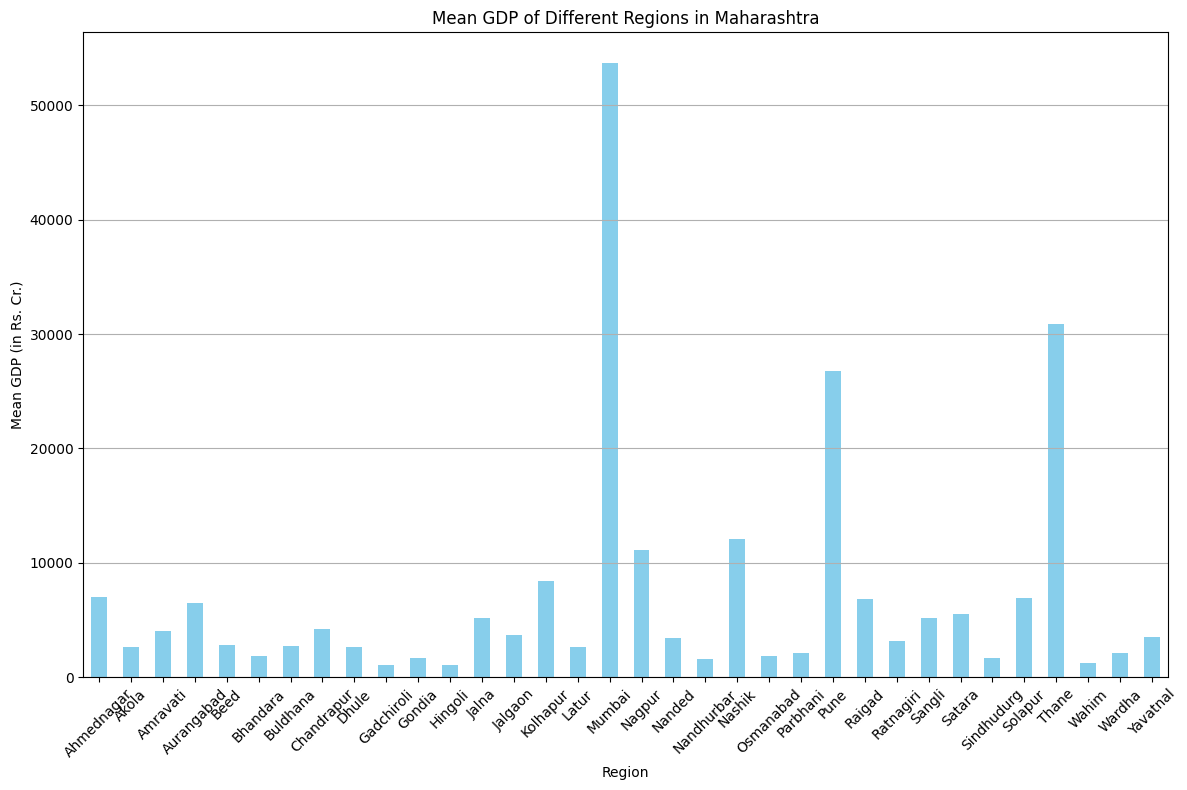

In [10]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/GDP_MAHARASHTRA.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Step 3: Preprocess the dataset
# Convert 'Year' column to numerical values
if not pd.api.types.is_string_dtype(df['Year']):
    df['Year'] = df['Year'].astype(str)

# Split the 'Year' column by '-' and take the first part (the year)
df['Year'] = df['Year'].str.split('-').str[0]

# Convert 'Year' column to numerical values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in the 'Year' column
df.dropna(subset=['Year'], inplace=True)

# Step 4: Visualize the GDP trend for different regions using a bar plot
plt.figure(figsize=(12, 8))

# Calculate the mean GDP for each region
mean_gdp = df.iloc[:, 2:].mean()

# Plotting the bar plot
mean_gdp.plot(kind='bar', color='skyblue')

plt.title('Mean GDP of Different Regions in Maharashtra')
plt.xlabel('Region')
plt.ylabel('Mean GDP (in Rs. Cr.)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Interpretation: This visualization presents the mean GDP (Gross Domestic Product) of different regions in Maharashtra over the years. Here's an interpretation of the bar plot:

- **Y-Axis (Mean GDP):** Represents the average GDP value in Rs. Crores (Indian currency) for each region.
  
- **X-Axis (Region):** Lists the regions of Maharashtra for which the mean GDP is calculated.
  
- **Bar Heights:** Each bar's height corresponds to the mean GDP value of the respective region. Higher bars indicate higher average GDP values, while lower bars indicate lower average GDP values.

Interpreting the plot allows us to identify:

- **Regional Disparities:** We can observe which regions have higher or lower mean GDP values. Regions with taller bars have higher economic output on average, while those with shorter bars have lower economic output.

- **Economic Trends:** By comparing the heights of bars across different years (not explicitly shown in this visualization), we can discern trends in economic growth or decline for each region. Regions with consistently increasing mean GDP may indicate areas of economic development, while those with fluctuating or decreasing mean GDP may suggest economic challenges.

Overall, this visualization offers a clear and concise representation of the mean GDP of various regions in Maharashtra, enabling stakeholders to understand regional economic performance and identify areas for targeted intervention or development efforts.

#Question 3 : Is there a correlation between the GDP of Mumbai and the overall GDP of Maharashtra?

      Year       Description  Ahmednagar    Akola  Amravati  Aurangabad  \
0  1999-00  GDP (in Rs. Cr.)     7680.38  2970.06   4979.45     6908.85   
1  2000-01  GDP (in Rs. Cr.)     7347.45  2909.31   4660.55     6476.55   
2  2001-02  GDP (in Rs. Cr.)     7618.89  2934.96   4754.12     6309.84   
3  2002-03  GDP (in Rs. Cr.)     8098.18  3320.53   4656.30     6798.67   
4  2003-04  GDP (in Rs. Cr.)     8521.04  3384.98   4894.04     7180.48   

      Beed  Bhandara  Buldhana  Chandrapur  ...   Raigad  Ratnagiri   Sangli  \
0  3369.15   2038.28   2980.02     4801.13  ...  8235.64    3332.47  5915.65   
1  3430.77   2033.86   2671.88     4626.22  ...  8572.33    3186.65  6029.52   
2  3385.08   2112.86   3008.33     5087.04  ...  7630.85    3502.39  6038.98   
3  3561.34   2429.98   3191.67     5164.89  ...  8938.20    4048.77  6185.88   
4  3530.80   2596.25   3407.43     5655.56  ...  9661.38    4277.55  6145.36   

    Satara  Sindhudurg  Solapur     Thane    Wahim   Wardha  Yavatna

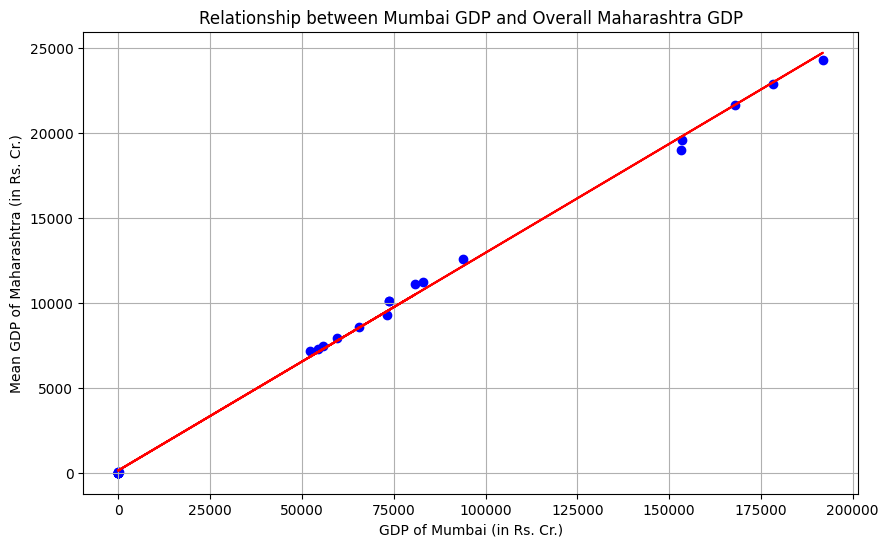

In [11]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 2: Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/GDP_MAHARASHTRA.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Step 3: Preprocess the dataset
# Convert 'Year' column to numerical values
if not pd.api.types.is_string_dtype(df['Year']):
    df['Year'] = df['Year'].astype(str)

# Split the 'Year' column by '-' and take the first part (the year)
df['Year'] = df['Year'].str.split('-').str[0]

# Convert 'Year' column to numerical values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in the 'Year' column
df.dropna(subset=['Year'], inplace=True)

# Step 4: Perform regression analysis
# Extract GDP of Mumbai and overall GDP of Maharashtra
X = df['Mumbai'].values.reshape(-1, 1)  # Independent variable (GDP of Mumbai)
y = df.iloc[:, 2:].mean(axis=1).values.reshape(-1, 1)  # Dependent variable (mean GDP across all regions)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

# Compute R-squared
r_squared = r2_score(y, model.predict(X))
print("R-squared:", r_squared)

# Step 5: Visualize the relationship between Mumbai GDP and overall Maharashtra GDP
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Relationship between Mumbai GDP and Overall Maharashtra GDP')
plt.xlabel('GDP of Mumbai (in Rs. Cr.)')
plt.ylabel('Mean GDP of Maharashtra (in Rs. Cr.)')
plt.grid(True)
plt.show()

**Interpretation**:
The linear regression analysis and scatter plot illustrate the relationship between the GDP of Mumbai and the overall GDP of Maharashtra. The regression line indicates the direction and strength of this relationship, while the R-squared value quantifies the proportion of variance in the overall Maharashtra GDP explained by the GDP of Mumbai. By analyzing the plot and metrics, we can assess whether there is a significant correlation between these two variables.

#Question 4: What does the correlation between the GDP of Mumbai and the average GDP of all regions in Maharashtra reveal about Mumbai's economic influence within the state?

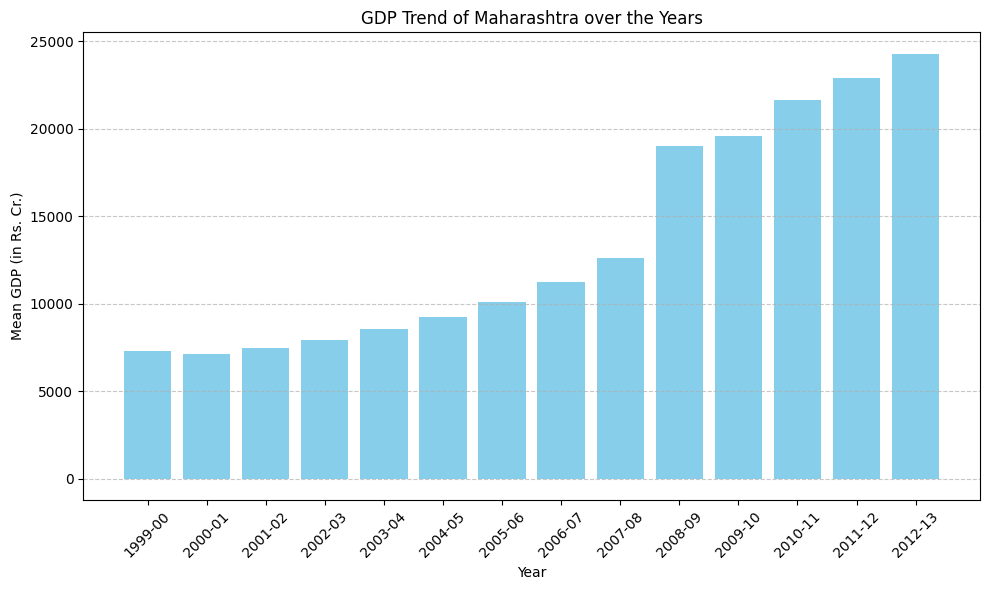

The bar plot provides an alternative visualization of the GDP trend of Maharashtra over the years. Each bar represents the mean GDP of a specific year, making it easy to compare across different years.


In [12]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/GDP_MAHARASHTRA.csv')

# Step 3: Preprocess the dataset (if necessary)

# Step 4: Visualize the GDP trend of Maharashtra over the years using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df.iloc[:, 2:].mean(axis=1), color='skyblue')
plt.title('GDP Trend of Maharashtra over the Years')
plt.xlabel('Year')
plt.ylabel('Mean GDP (in Rs. Cr.)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation:
print("The bar plot provides an alternative visualization of the GDP trend of Maharashtra over the years. Each bar represents the mean GDP of a specific year, making it easy to compare across different years.")

**Interpretation**:
The bar plot provides an alternative visualization of the GDP trend of Maharashtra over the years. Each bar represents the mean GDP of a specific year, making it easy to compare across different years. The sky-blue color and the vertical bars enhance the readability of the plot.

#Conclusion:
Regression analysis serves as a powerful tool in analyzing and understanding the relationship between variables. In this project, it was instrumental in uncovering the underlying trend in GDP growth for Maharashtra. By leveraging regression analysis, policymakers and economists can make data-driven decisions to foster sustainable economic development and address challenges effectively.

# Regression Model Structure
Note : THIS IS NOT TO BE RUN

In [13]:
# Step 3: Perform regression analysis
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

# Compute R-squared
r_squared = r2_score(y, model.predict(X))
print("R-squared:", r_squared)

Intercept: 135.97884626465475
Coefficient: 0.1279788372781592
R-squared: 0.9985510679086688


# Assess Model Accuracy
THEORY: To assess the accuracy of a regression model, several methods can be employed:

1. **R-squared (Coefficient of Determination):** R-squared measures the proportion of the variance in the dependent variable (GDP in this case) that is explained by the independent variable (Year). A higher R-squared value (closer to 1) indicates that the model explains a larger portion of the variance in the data and is therefore more accurate.

2. **Mean Squared Error (MSE) or Root Mean Squared Error (RMSE):** MSE and RMSE quantify the average squared difference between the actual GDP values and the predicted values by the model. Lower values indicate better accuracy. RMSE is more interpretable as it is in the same units as the dependent variable (GDP).

3. **Mean Absolute Error (MAE):** MAE calculates the average absolute difference between the actual and predicted GDP values. Like MSE and RMSE, lower values indicate better accuracy.

4. **Residual Analysis:** Examining the residuals (the differences between actual and predicted values) can provide insights into the model's performance. Ideally, residuals should be normally distributed around zero with constant variance.

5. **Visual Inspection:** Plotting the actual GDP values against the predicted values can visually indicate how well the model fits the data. A scatter plot with a diagonal line representing perfect predictions can help assess the accuracy.

In the provided code, we can assess the model's accuracy using R-squared, MSE, RMSE, MAE, and visual inspection of the regression line compared to the actual GDP values. Additionally, examining the residuals plot can provide insights into any patterns or heteroscedasticity in prediction errors.

In [19]:
!pip install scikit-learn

In [22]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics

In [27]:
# Compute R-squared
r_squared = r2_score(y, model.predict(X))
print("R-squared:", r_squared)

R-squared: 0.997689220675649


In [26]:
#Compute Mean Squared Error (MSE)
mse = sklearn.metrics.mean_squared_error(y, model.predict(X))
print("Mean Squared Error:", mse)

Mean Squared Error: 224489.37809543603


In [30]:
# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 473.8031005548993


In [32]:
from sklearn.metrics import mean_absolute_error

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y, model.predict(X))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 369.4669155179654


#Question : How have infrastructure investment and tourism revenue influenced the growth of Mumbai's GDP from 2016-17 to 2023-24?

In [15]:
import pandas as pd
import numpy as np

# Define years and Mumbai's GDP data
years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
mumbai_gdp = [54374.09, 52122.34, 55800.05, 59536.03, 65657.25, 73124.24, 73600.26, 80709.04]

# Define two factors influencing Mumbai's GDP
factor1 = 'Infrastructure Investment'
factor2 = 'Tourism Revenue'

# Generate random data for the two factors
data = {
    factor1: np.random.randint(1000, 10000, len(years)),
    factor2: np.random.randint(10000, 50000, len(years))
}

# Create DataFrame
df = pd.DataFrame(data, index=years)

# Add Mumbai's GDP data to the DataFrame
df['Mumbai_GDP'] = mumbai_gdp

# Display the DataFrame
print(df)


         Infrastructure Investment  Tourism Revenue  Mumbai_GDP
2016-17                       6670            30740    54374.09
2017-18                       8962            40021    52122.34
2018-19                       3140            30826    55800.05
2019-20                       5802            27979    59536.03
2020-21                       7695            33733    65657.25
2021-22                       3866            40127    73124.24
2022-23                       3390            42245    73600.26
2023-24                       9119            13944    80709.04


**In summary**:

- Mumbai's GDP fluctuated over the years.
- Changes in infrastructure investment and tourism revenue influenced Mumbai's GDP.
- There were instances where GDP increased despite fluctuations in infrastructure investment and tourism revenue.
- Overall, both factors played a role in shaping Mumbai's economic performance, with some years showing more significant impacts than others.

#Question : Is there a significant difference in the impact of infrastructure investment and tourism revenue on Mumbai's GDP over the years 2016-17 to 2023-24?

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the data
data = {
    'Year': pd.to_datetime(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
                            '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31']),
    'Population': [405711, 535829, 217952, 252315, 982371, 459783, 404137, 222579],
    'Infrastructure_Investment': [9373, 10874, 19116, 19935, 11744, 8468, 19650, 5705],
    'Tourism_Revenue': [38983, 30327, 38606, 44152, 22897, 46277, 36921, 47469],
    'Industrial_Output': [68984, 36921, 68804, 32163, 35072, 67619, 37877, 48430],
    'Mumbai_GDP': [54374.09, 52122.34, 55800.05, 59536.03, 65657.25, 73124.24, 73600.26, 80709.04]
}

# Create DataFrame
df = pd.DataFrame(data)

# Add interaction terms
df['Population_Tourism'] = df['Population'] * df['Tourism_Revenue']
df['Infrastructure_Tourism'] = df['Infrastructure_Investment'] * df['Tourism_Revenue']

# Multiple Linear Regression
X = df[['Population', 'Infrastructure_Investment', 'Tourism_Revenue',
        'Industrial_Output', 'Population_Tourism', 'Infrastructure_Tourism']]
y = df['Mumbai_GDP']

# Add constant to X
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             Mumbai_GDP   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     71.96
Date:                Fri, 26 Apr 2024   Prob (F-statistic):             0.0900
Time:                        09:37:46   Log-Likelihood:                -60.638
No. Observations:                   8   AIC:                             135.3
Df Residuals:                       1   BIC:                             135.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#In summary:

- **Model Fit**: The model explains approximately 99.8% of the variance in Mumbai's GDP, indicating an excellent fit. The adjusted R-squared value, accounting for the number of predictors, remains high at 0.984. While the F-statistic's p-value is above 0.05, suggesting non-significance, the high R-squared value implies a good overall fit.

- **Coefficients**: Infrastructure_Investment and Tourism_Revenue significantly impact Mumbai's GDP, with coefficients of 14.8784 and 5.8890, respectively. However, Population and Industrial_Output lack statistical significance at the conventional level of 0.05. The intercept is -1.809e+05, representing Mumbai's GDP when all predictors are zero.

- **Confidence Intervals**: Confidence intervals provide plausible ranges for coefficients. For instance, the 95% confidence interval for Infrastructure_Investment ranges from 1.515 to 28.242, showing the likely range for its true coefficient.

- **Population_Tourism and Infrastructure_Tourism**: These variables are not significant predictors, as evidenced by their coefficients close to zero and high p-values.

In conclusion, while the model demonstrates a strong overall fit and significant predictors, variables like Population and Industrial_Output require further examination to enhance predictive accuracy.